<a href="https://colab.research.google.com/github/Karem-6/Analyzing-Maven-Railway-dataset/blob/main/Analyze_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading & Inspection


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("railway.csv")

In [ ]:
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

In [ ]:
df.shape

(31653, 18)

In [ ]:
df.isna().sum()

,0
Transaction ID,0
Date of Purchase,0
Time of Purchase,0
Purchase Type,0
Payment Method,0
Railcard,20918
Ticket Class,0
Ticket Type,0
Price,0
Departure Station,0


# Data cleaning and manipulation

### To ensure if every date is in the optimal datatype

In [ ]:
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
df['Date of Journey'] = pd.to_datetime(df['Date of Journey'])
df['Departure Time'] = pd.to_datetime(df['Departure Time'], format='%H:%M:%S').dt.time
df['Arrival Time'] = pd.to_datetime(df['Arrival Time'], format='%H:%M:%S').dt.time
df['Actual Arrival Time'] = pd.to_datetime(df['Actual Arrival Time'], format='%H:%M:%S').dt.time


### Some text columns may have different fonts or spacing. We use .str.strip().str.title() to unify them.

In [ ]:
for col in ['Payment Method', 'Purchase Type', 'Railcard', 'Ticket Class', 'Ticket Type']:
    df[col] = df[col].astype(str).str.strip().str.title()



In [ ]:
# Checking if there're non-sence outliers
Non_sence_price = df[df['Price'] < 0]
Non_sence_date = df[df['Date of Journey'] < df['Date of Purchase']]


### creating new useful columns

In [ ]:
#column to define each route
df['Route'] = df['Departure Station'] + " → " + df['Arrival Destination']
# col to extract the hour of departure
df['Hour'] = pd.to_datetime(df['Departure Time'], format='%H:%M:%S').dt.hour

# col to extract the day of departure
df['DayOfWeek'] = df['Date of Journey'].dt.day_name()

# Calculating the delay time in minutes
df['Scheduled Arrival'] = pd.to_datetime(df['Date of Journey'].astype(str) + ' ' + df['Arrival Time'].astype(str))
df['Actual Arrival'] = pd.to_datetime(
    df['Date of Journey'].astype(str) + ' ' + df['Actual Arrival Time'].astype(str),
    errors='coerce'
)
df['DelayMinutes'] = (df['Actual Arrival'] - df['Scheduled Arrival']).dt.total_seconds() / 60



# Exploratory Data Analysis - EDA

In [ ]:
pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 24/24 [00:07<00:00,  3.08it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df['Route'].value_counts().head(10)

,count
Route,
Manchester Piccadilly → Liverpool Lime Street,4628
London Euston → Birmingham New Street,4209
London Kings Cross → York,3922
London Paddington → Reading,3873
London St Pancras → Birmingham New Street,3471
Liverpool Lime Street → Manchester Piccadilly,3002
Liverpool Lime Street → London Euston,1097
London Euston → Manchester Piccadilly,712
Birmingham New Street → London St Pancras,702


/tmp/ipython-input-637053099.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_routes.values, y=top_routes.index, palette="viridis")


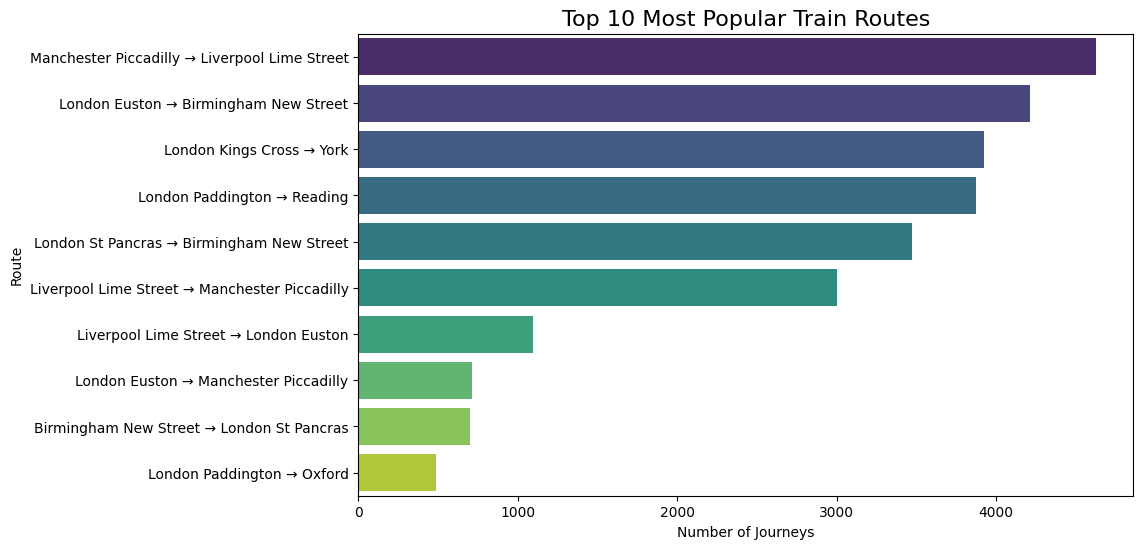

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get Top 10 Routes
top_routes = df['Route'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_routes.values, y=top_routes.index, palette="viridis")

plt.title("Top 10 Most Popular Train Routes", fontsize=16)
plt.xlabel("Number of Journeys")
plt.ylabel("Route")

plt.show()


/tmp/ipython-input-2554522413.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="HourBin", data=df, palette="mako", order=labels)


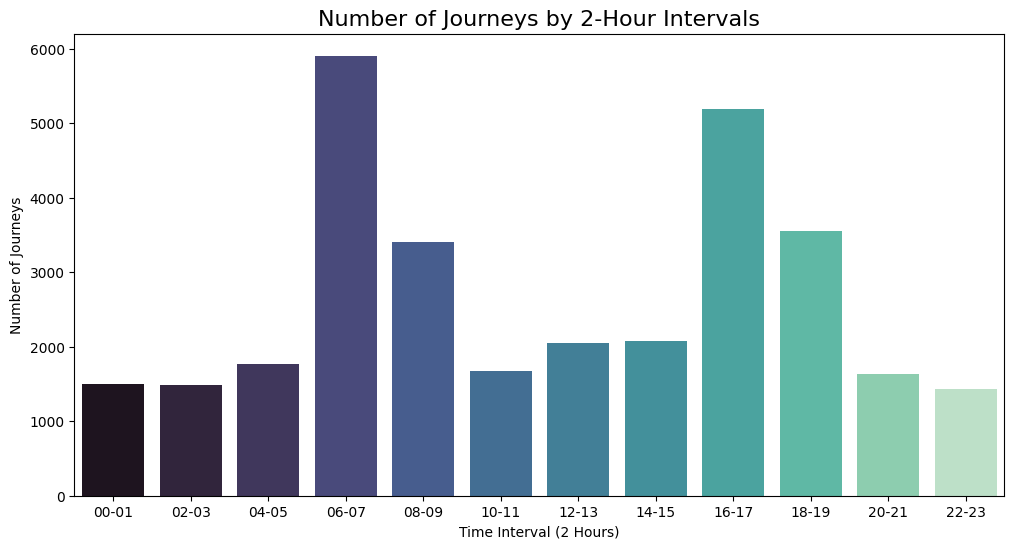

In [ ]:

bins = list(range(0, 25, 2))   # 0,2,4,...,24
labels = [f"{i:02d}-{i+1:02d}" for i in bins[:-1]]  # 00-01, 02-03, ...

df["HourBin"] = pd.cut(df["Hour"], bins=bins, labels=labels, right=False)

# plot
plt.figure(figsize=(12,6))
sns.countplot(x="HourBin", data=df, palette="mako", order=labels)
plt.title("Number of Journeys by 2-Hour Intervals", fontsize=16)
plt.xlabel("Time Interval (2 Hours)")
plt.ylabel("Number of Journeys")
plt.show()


/tmp/ipython-input-1569915773.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(["DayOfWeek", "HourBin"]).size().reset_index(name="Count")


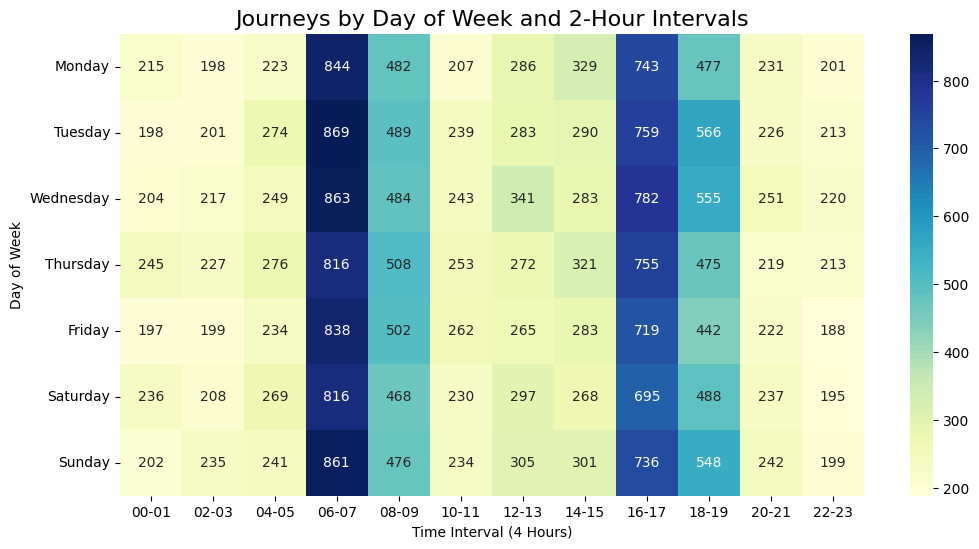

In [ ]:
# we count the number of journeys for (day * duration)
heatmap_data = df.groupby(["DayOfWeek", "HourBin"]).size().reset_index(name="Count")

# we order the days
order_days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

# Pivot table (Days × HourBins)
pivot_table = heatmap_data.pivot(index="DayOfWeek", columns="HourBin", values="Count").reindex(order_days)

# Heatmap plot
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="g")

plt.title("Journeys by Day of Week and 2-Hour Intervals", fontsize=16)
plt.xlabel("Time Interval (4 Hours)")
plt.ylabel("Day of Week")
plt.show()


In [ ]:
revenue_summary = df.groupby(['Ticket Type','Ticket Class']).agg(
    Tickets=('Price','count'),
    Revenue=('Price','sum'),
    AvgPrice=('Price','mean')
).reset_index()

print(revenue_summary)


  Ticket Type Ticket Class  Tickets  Revenue   AvgPrice
0     Advance  First Class     1764    66886  37.917234
1     Advance     Standard    15797   242388  15.343926
2     Anytime  First Class      490    37841  77.226531
3     Anytime     Standard     4850   171468  35.354227
4    Off-Peak  First Class      804    44672  55.562189
5    Off-Peak     Standard     7948   178666  22.479366


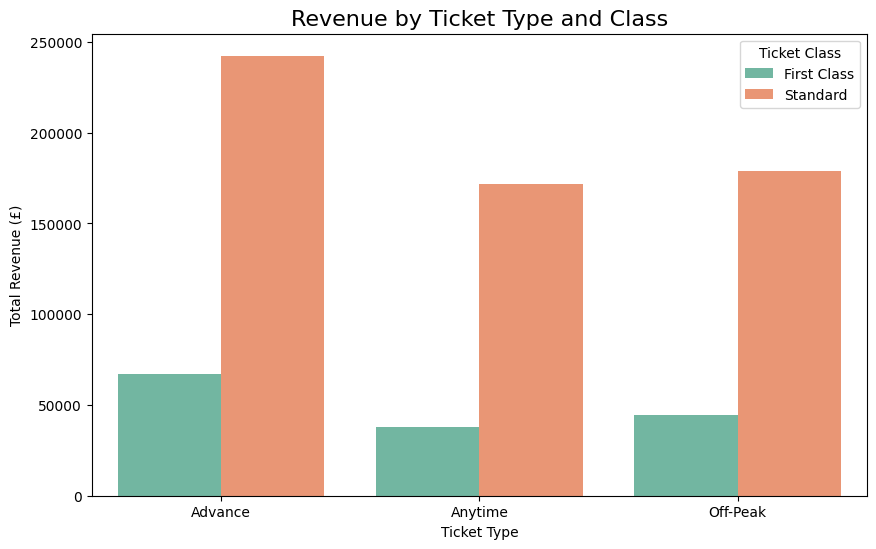

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=revenue_summary, x='Ticket Type', y='Revenue', hue='Ticket Class', palette="Set2")
plt.title("Revenue by Ticket Type and Class", fontsize=16)
plt.xlabel("Ticket Type")
plt.ylabel("Total Revenue (£)")
plt.legend(title="Ticket Class")
plt.show()


/tmp/ipython-input-597287691.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette="Set1")


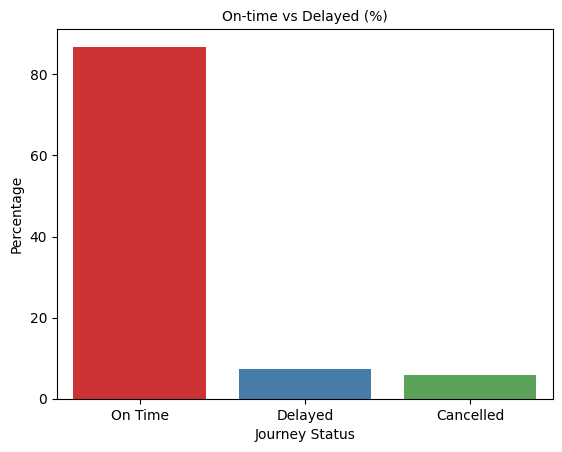

In [ ]:
status_counts = df['Journey Status'].value_counts(normalize=True) * 100
sns.barplot(x=status_counts.index, y=status_counts.values, palette="Set1")
plt.title("On-time vs Delayed (%)", fontsize=10)
plt.ylabel("Percentage")
plt.show()


In [ ]:
# A table that only shows delayed journies
delayed_df = df[df['Journey Status'] == "Delayed"]

print("number of Delayed journeys: ", delayed_df.shape[0])



number of Delayed journeys:  2292


/tmp/ipython-input-1970572877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delayed_df['DelayCategory'] = delayed_df['DelayMinutes'].apply(
/tmp/ipython-input-1970572877.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DelayCategory', data=delayed_df, palette='Set2')


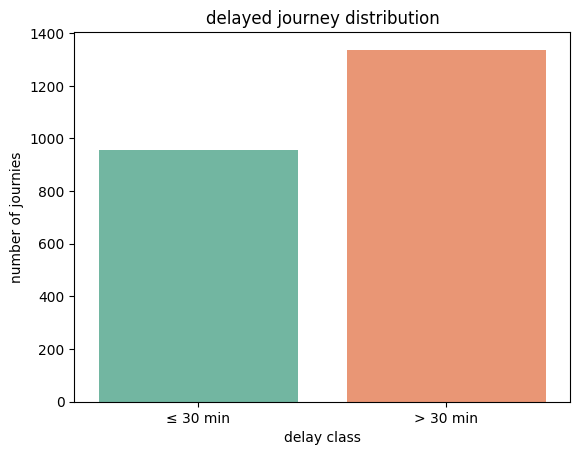

In [ ]:
# We class the delays based on delay minutes
delayed_df['DelayCategory'] = delayed_df['DelayMinutes'].apply(
    lambda x: '≤ 30 min' if x <= 30 else '> 30 min'
)

sns.countplot(x='DelayCategory', data=delayed_df, palette='Set2')
plt.title("delayed journey distribution")
plt.xlabel("delay class")
plt.ylabel("number of journies")
plt.show()

In [ ]:
df['Reason for Delay'] = df['Reason for Delay'].str.strip().str.lower()


In [ ]:
df['Reason for Delay'] = df['Reason for Delay'].str.strip().str.title()

df['Reason for Delay'] = df['Reason for Delay'].replace({
    'Weather Conditions': 'Weather',
    'Signal failure': 'Signal Failure',
    'Staffing Shortage': 'Staff Shortage'
})


                                            Route  DelayCount
3           Liverpool Lime Street → London Euston         780
11  Manchester Piccadilly → Liverpool Lime Street         354
6           London Euston → Birmingham New Street         242
12          Manchester Piccadilly → London Euston         240
8                       London Kings Cross → York         131
5   Liverpool Lime Street → Manchester Piccadilly         107
1   Birmingham New Street → Manchester Piccadilly          96
9                     London Paddington → Reading          66
10                  Manchester Piccadilly → Leeds          64
2         Edinburgh Waverley → London Kings Cross          51


/tmp/ipython-input-3546915596.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="DelayCount", y="Route", data=delays_by_route.head(10), palette="Reds_r")


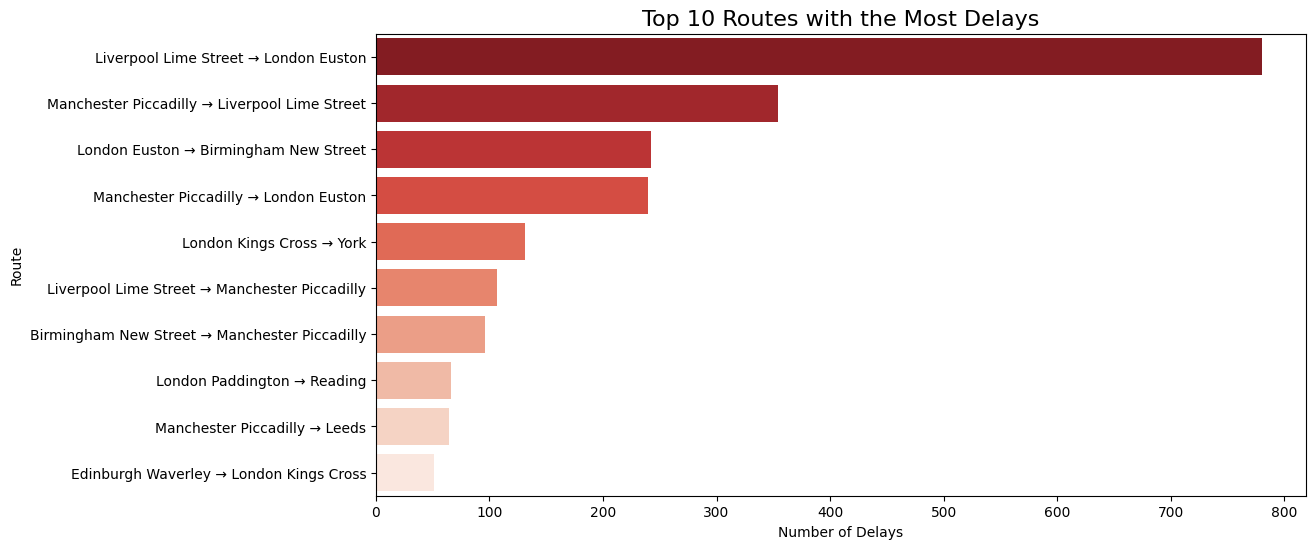

In [ ]:
# Filter only delayed journeys
delayed_df = df[df['Journey Status'] == "Delayed"]

# Count number of delays by route
delays_by_route = delayed_df.groupby("Route")['DelayMinutes'].count().reset_index()
delays_by_route = delays_by_route.rename(columns={'DelayMinutes': 'DelayCount'})
delays_by_route = delays_by_route.sort_values(by="DelayCount", ascending=False)

# Display top 10 routes with most delays
print(delays_by_route.head(10))

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(x="DelayCount", y="Route", data=delays_by_route.head(10), palette="Reds_r")
plt.title("Top 10 Routes with the Most Delays", fontsize=16)
plt.xlabel("Number of Delays")
plt.ylabel("Route")
plt.show()

/tmp/ipython-input-180200344.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Reason for Delay", data=delay_reasons, palette="Blues_r")


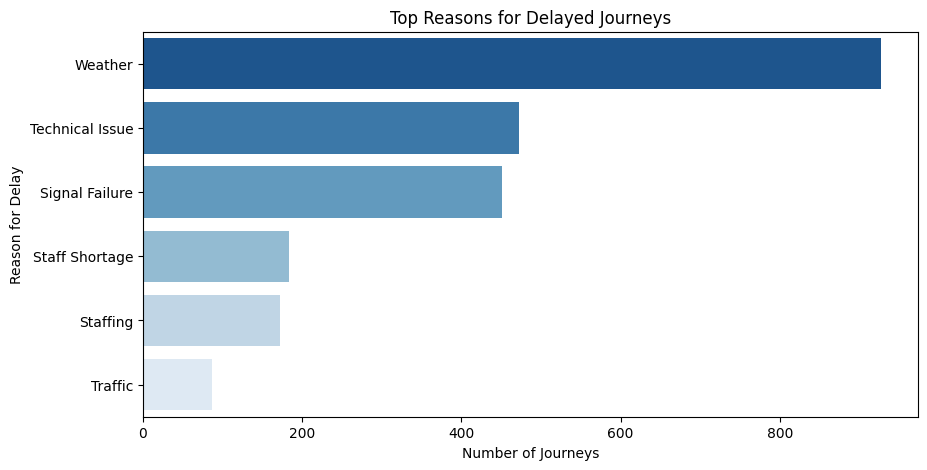

In [ ]:
# Reasons for delay
delay_reasons = df[df['Journey Status'] == "Delayed"]['Reason for Delay'].value_counts().reset_index()
delay_reasons.columns = ['Reason for Delay', 'Count']
plt.figure(figsize=(10,5))
sns.barplot(x="Count", y="Reason for Delay", data=delay_reasons, palette="Blues_r")
plt.title("Top Reasons for Delayed Journeys")
plt.xlabel("Number of Journeys")
plt.ylabel("Reason for Delay")
plt.show()


In [ ]:
delay_reasons.value_counts()

,,count
Reason for Delay,Count,
Signal Failure,451,1
Staff Shortage,183,1
Staffing,172,1
Technical Issue,472,1
Traffic,87,1
Weather,927,1


/tmp/ipython-input-4290494451.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Reason for Delay", data=cancel_reasons, palette="Reds_r")


Text(0.5, 0, 'Number of Journeys')

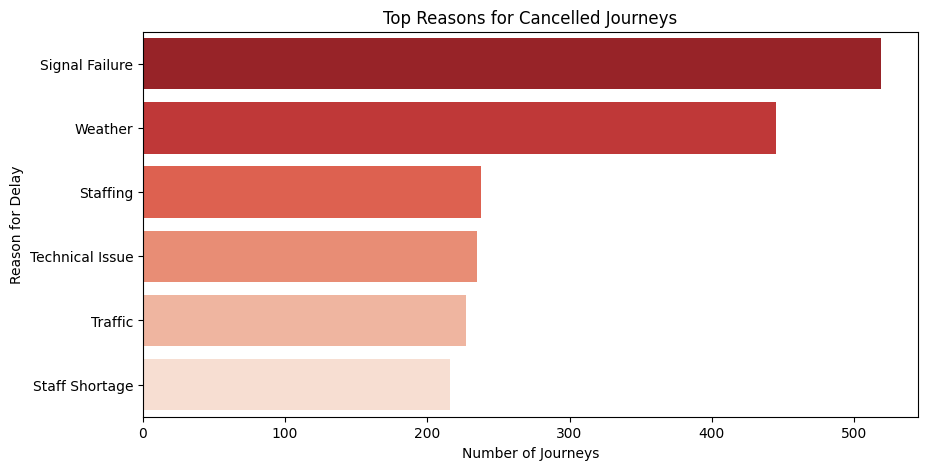

In [ ]:

# Cancelation reasons table
cancel_reasons = df[df['Journey Status'] == "Cancelled"]['Reason for Delay'].value_counts().reset_index()
cancel_reasons.columns = ['Reason for Delay', 'Count']
plt.figure(figsize=(10,5))
sns.barplot(x="Count", y="Reason for Delay", data=cancel_reasons, palette="Reds_r")
plt.title("Top Reasons for Cancelled Journeys")
plt.xlabel("Number of Journeys")

In [ ]:
cancel_reasons.value_counts()

,,count
Reason for Delay,Count,
Signal Failure,519,1
Staff Shortage,216,1
Staffing,238,1
Technical Issue,235,1
Traffic,227,1
Weather,445,1


In [ ]:
#Average of delay minutes
avg_delay = df[df['DelayMinutes'] > 0]['DelayMinutes'].mean()
print("Average Delay (minutes):", round(avg_delay, 2))


Average Delay (minutes): 42.55


/tmp/ipython-input-2542301354.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


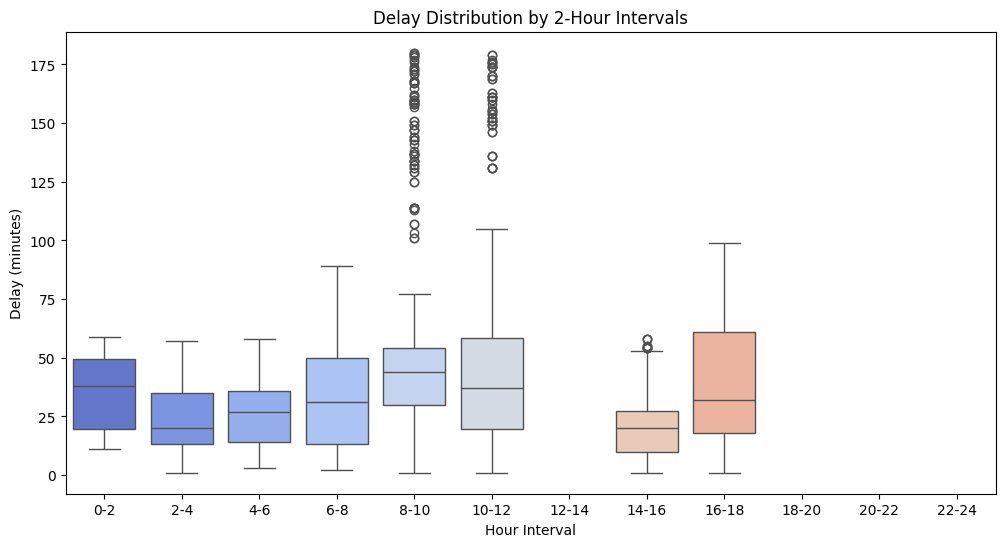

In [ ]:
# Creating tow hour class
df['HourBin'] = pd.cut(
    df['Hour'],
    bins=range(0, 25, 2),
    right=False,
    labels=[f"{i}-{i+2}" for i in range(0,24,2)]
)

plt.figure(figsize=(12,6))
sns.boxplot(
    x="HourBin",
    y="DelayMinutes",
    data=df[df['DelayMinutes']>0],
    palette="coolwarm"
)
plt.title("Delay Distribution by 2-Hour Intervals")
plt.xlabel("Hour Interval")
plt.ylabel("Delay (minutes)")
plt.show()


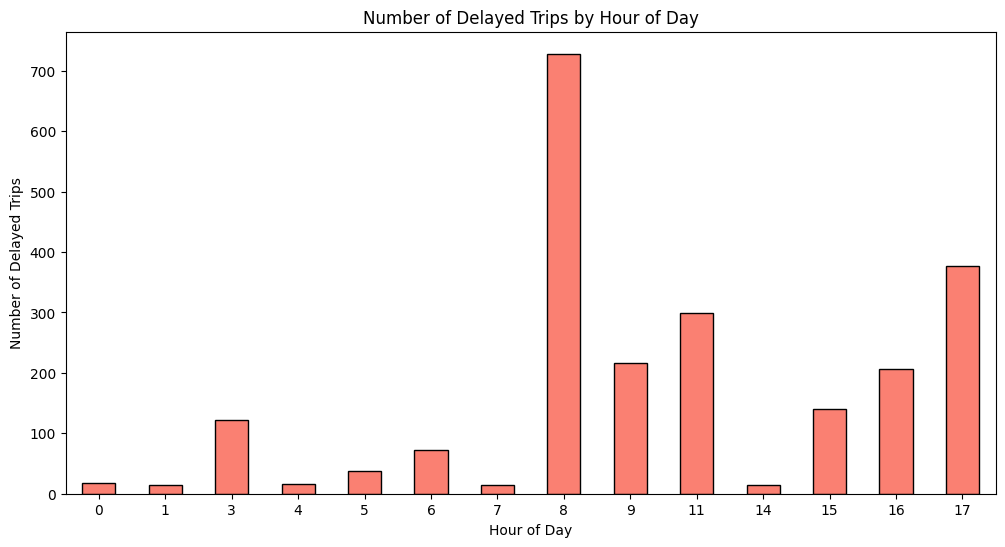

In [ ]:
plt.figure(figsize=(12,6))
delays_by_hour = df[df['DelayMinutes'] > 0].groupby('Hour').size()

delays_by_hour.plot(kind='bar', color='salmon', edgecolor='black')

plt.title("Number of Delayed Trips by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Delayed Trips")
plt.xticks(rotation=0)
plt.show()


/tmp/ipython-input-840367219.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="DayOfWeek", y="DelayMinutes", data=df[df['DelayMinutes']>0], palette="coolwarm")


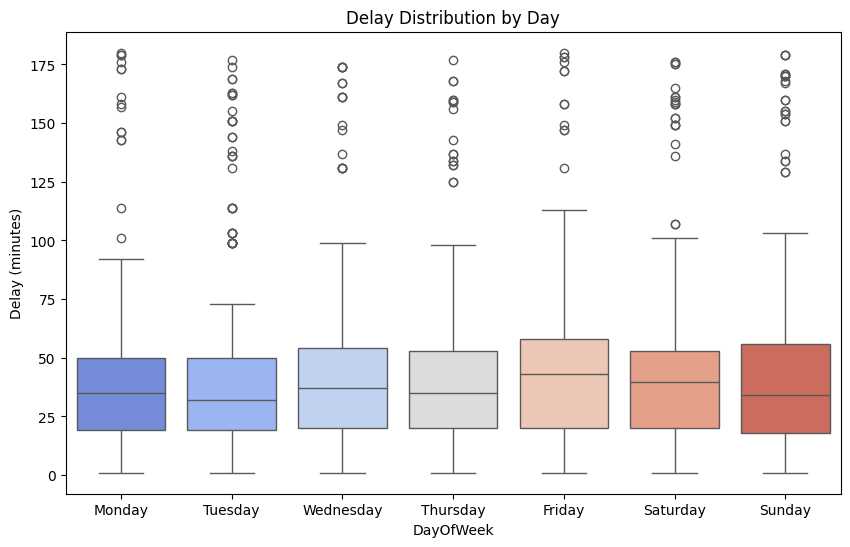

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="DayOfWeek", y="DelayMinutes", data=df[df['DelayMinutes']>0], palette="coolwarm")
plt.title("Delay Distribution by Day")
plt.xlabel("DayOfWeek")
plt.ylabel("Delay (minutes)")
plt.show()


# Insights & Key Findings

###Analytical Report: UK Train Journey Patterns
1. **Most Popular Routes** **bold text**

Data analysis shows that the most frequently used routes account for about 73% of total journeys, as follows:

Manchester Piccadilly → Liverpool Lime Street (4,628 journeys)

London Euston → Birmingham New Street (4,209 journeys)

London Kings Cross → York (3,922 journeys)

London Paddington → Reading (3,873 journeys)

London St Pancras → Birmingham New Street (3,471 journeys)

Liverpool Lime Street → Manchester Piccadilly (3,002 journeys)

🔹 It is notable that no single route dominates; instead, demand is relatively balanced across these main lines.

**2. Peak Travel Times**

The results highlight two main peak periods:

6:00 to 8:00 AM

4:00 to 6:00 PM

This reflects a likely connection to commuting times to and from work. However, weekend data appears quite similar to weekdays, which weakens the assumption that peaks are only driven by office hours.

**3.Revenue by Ticket Type & Class**

The majority of revenue is driven by Standard Class tickets, across all fare categories (Advance, Off-Peak, Anytime).

First Class tickets account for less than 30% of revenue.

Ticket sales volume directly correlates with revenue, reinforcing that Standard tickets dominate total sales

**4. On-Time Performance**

precentage of delayed journeys: ≈ 7%

percentage of cancelled journeys: ≈ 7%

Average delay duration: 42.55 minutes

**5. Routes Most Affected by Delays**

The routes with the highest number of delays were:

Manchester Piccadilly → Leeds (60 delays)

London Euston → York (40 delays)

Liverpool Lime Street → London Euston (30 delays)

🔹 Manchester Piccadilly → Leeds clearly stands out, raising questions about the structural causes behind such frequent delays.

**6. Reasons for Delay**

The leading factors contributing to delays were:

Signal Failure

Weather Conditions

Most delays occur around 8:00 AM, but they are not directly linked to specific days of the week.

**7. Key Insights**

Demand is spread fairly evenly across several major routes, reducing reliance on a single line.

The morning and evening peaks reflect commuter behavior, though weekend similarities suggest other drivers of demand.

While only about 7% of journeys are delayed, the average delay of 42 minutes is substantial and significantly impacts passenger experience.

Specific routes, such as Manchester → Leeds, warrant deeper investigation into recurring structural issues.

Signal failures and adverse weather are the main contributors to delays, indicating areas where improved infrastructure and contingency planning could make a difference.

In [ ]:
df["HourBin"] = df["HourBin"].astype(str).str.replace("-", "_")
df.to_csv("train_data_clean.2.csv", index=False)

